In [1]:
import numpy as np
import os
import tensorflow as tf
from matplotlib import pyplot as plt
from tensorflow.keras.layers import Embedding,Dense,SimpleRNN
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import Adam

In [2]:
input_word = "abcdefghijklmnopqrstuvwxyz"
w_to_id = {'a': 0, 'b': 1, 'c': 2, 'd': 3, 'e': 4,
           'f': 5, 'g': 6, 'h': 7, 'i': 8, 'j': 9,
           'k': 10, 'l': 11, 'm': 12, 'n': 13, 'o': 14,
           'p': 15, 'q': 16, 'r': 17, 's': 18, 't': 19,
           'u': 20, 'v': 21, 'w': 22, 'x': 23, 'y': 24, 'z': 25}

training_set_scaled = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10,
                       11, 12, 13, 14, 15, 16, 17, 18, 19, 20,
                       21, 22, 23, 24, 25]

x_train = []
y_train = []

# 用for循环从数字列表中把连续的4个数作为输入特征添加到x_train,第五个数添加到y_train中
for i in range(4,26):
    x_train.append(training_set_scaled[i - 4:i])
    y_train.append(training_set_scaled[i])
print("x_train:{},\n y_train:{}".format(x_train,y_train))

x_train:[[0, 1, 2, 3], [1, 2, 3, 4], [2, 3, 4, 5], [3, 4, 5, 6], [4, 5, 6, 7], [5, 6, 7, 8], [6, 7, 8, 9], [7, 8, 9, 10], [8, 9, 10, 11], [9, 10, 11, 12], [10, 11, 12, 13], [11, 12, 13, 14], [12, 13, 14, 15], [13, 14, 15, 16], [14, 15, 16, 17], [15, 16, 17, 18], [16, 17, 18, 19], [17, 18, 19, 20], [18, 19, 20, 21], [19, 20, 21, 22], [20, 21, 22, 23], [21, 22, 23, 24]],
 y_train:[4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25]


In [3]:

np.random.seed(7)
np.random.shuffle(x_train)
np.random.seed(7)
np.random.shuffle(y_train)
tf.random.set_seed(7)

In [4]:
x_train = np.reshape(x_train,(len(x_train),4))
y_train = np.array(y_train)

Train on 22 samples
Epoch 1/100
22/22 [==============================] - 1s 42ms/sample - loss: 3.2579 - sparse_categorical_accuracy: 0.0455
Epoch 2/100
22/22 [==============================] - 0s 909us/sample - loss: 3.2364 - sparse_categorical_accuracy: 0.0455
Epoch 3/100
22/22 [==============================] - 0s 863us/sample - loss: 3.2139 - sparse_categorical_accuracy: 0.0909
Epoch 4/100
22/22 [==============================] - 0s 864us/sample - loss: 3.1891 - sparse_categorical_accuracy: 0.0455
Epoch 5/100
22/22 [==============================] - 0s 955us/sample - loss: 3.1619 - sparse_categorical_accuracy: 0.0455
Epoch 6/100
22/22 [==============================] - 0s 818us/sample - loss: 3.1318 - sparse_categorical_accuracy: 0.0455
Epoch 7/100
22/22 [==============================] - 0s 863us/sample - loss: 3.0974 - sparse_categorical_accuracy: 0.0455
Epoch 8/100
22/22 [==============================] - 0s 864us/sample - loss: 3.0570 - sparse_categorical_accuracy: 0.0909
Epoch

Epoch 68/100
22/22 [==============================] - 0s 955us/sample - loss: 0.4728 - sparse_categorical_accuracy: 1.0000
Epoch 69/100
22/22 [==============================] - 0s 818us/sample - loss: 0.4584 - sparse_categorical_accuracy: 1.0000
Epoch 70/100
22/22 [==============================] - 0s 1ms/sample - loss: 0.4444 - sparse_categorical_accuracy: 1.0000
Epoch 71/100
22/22 [==============================] - 0s 1ms/sample - loss: 0.4310 - sparse_categorical_accuracy: 1.0000
Epoch 72/100
22/22 [==============================] - 0s 2ms/sample - loss: 0.4181 - sparse_categorical_accuracy: 1.0000
Epoch 73/100
22/22 [==============================] - 0s 1ms/sample - loss: 0.4057 - sparse_categorical_accuracy: 1.0000
Epoch 74/100
22/22 [==============================] - 0s 1ms/sample - loss: 0.3937 - sparse_categorical_accuracy: 1.0000
Epoch 75/100
22/22 [==============================] - 0s 1ms/sample - loss: 0.3823 - sparse_categorical_accuracy: 1.0000
Epoch 76/100
22/22 [========

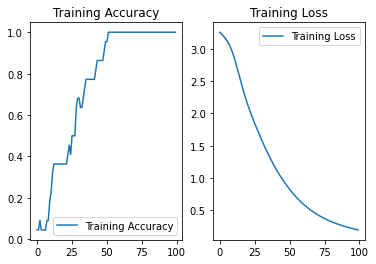

input the number of test alphabet:3
input test alphabet:abcd
abcd->e
input test alphabet:hijk
hijk->l
input test alphabet:okcd
okcd->e


In [5]:
model = Sequential([
    Embedding(26,2),
    SimpleRNN(10),
    Dense(26,activation="softmax")
])
model.compile(optimizer=tf.keras.optimizers.Adam(0.01),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['sparse_categorical_accuracy'])

checkpoint_save_path = "./checkpoint/rnn_embedding_4pre1.ckpt"

if os.path.exists(checkpoint_save_path + '.index'):
    print('-------------load the model-----------------')
    model.load_weights(checkpoint_save_path)

cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_save_path,
                                                 save_weights_only=True,
                                                 save_best_only=True,
                                                 monitor='loss') 
history = model.fit(x_train, y_train, batch_size=32, epochs=100, callbacks=[cp_callback])

model.summary()

file = open('./weights.txt', 'w')  # 参数提取
for v in model.trainable_variables:
    file.write(str(v.name) + '\n')
    file.write(str(v.shape) + '\n')
    file.write(str(v.numpy()) + '\n')
file.close()


acc = history.history['sparse_categorical_accuracy']
loss = history.history['loss']

plt.subplot(1, 2, 1)
plt.plot(acc, label='Training Accuracy')
plt.title('Training Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(loss, label='Training Loss')
plt.title('Training Loss')
plt.legend()
plt.show()


preNum = int(input("input the number of test alphabet:"))
for i in range(preNum):
    alphabet1 = input("input test alphabet:")
    alphabet = [w_to_id[a] for a in alphabet1]
    # 使alphabet符合Embedding输入要求：[送入样本数， 时间展开步数]。
    # 此处验证效果送入了1个样本，送入样本数为1；输入4个字母出结果，循环核时间展开步数为4。
    alphabet = np.reshape(alphabet, (1, 4))
    result = model.predict([alphabet])
    pred = tf.argmax(result, axis=1)
    pred = int(pred)
    tf.print(alphabet1 + '->' + input_word[pred])
